In [1]:
import pandas as pd
from dna_features_viewer import GraphicFeature, GraphicRecord
import numpy as np

In [94]:
import matplotlib.pyplot as plt

## Clusters with 7 taxons

In [4]:
cl = pd.read_csv('cluster_6.csv')
cl

,Unnamed: 0,# Species,Genes,Alg.-Conn.,Aerococcus_christensenii.faa,Aerococcus_urina.faa,Aerococcus_urinaeequi.faa,Aerococcus_urinaehominis.faa,Aerococcus_viridans.faa,Anoxybacillus_amylolyticus.faa,...,Thermoanaerobacter,Aerococcus,Anoxybacillus,Paenibacillus,Enterococcus,virgibacillius,Streptococcus,Staphylococcus,genes,taxons
0,1692,38,41,0.617,WP_060776873.1,WP_013668580.1,WP_026465774.1,WP_067979319.1,WP_004262670.1,WP_003397701.1,...,0,5,0,4,1,2,5,4,0,6
1,9040,38,41,0.614,WP_060776538.1,WP_060778783.1,WP_059349315.1,WP_067978731.1,WP_039934536.1,WP_009361475.1,...,0,2,0,2,5,1,6,3,0,6


In [57]:
cl_1 = ['Aerococcus_urinaehominis', 'Anoxybacillus_amylolyticus', 'Enterococcus_durans', 'Paenibacillus_stellifer']
cl_1.append('Staphylococcus_auricularis')   #  first 3 are the same
cl_1.append('Streptococcus_australis')   #  first 4 are equal
cl_1.append('virgibacillius_dokdonensis')     #  or the last

In [7]:
cl_2 = ['Aerococcus_viridans', 'Anoxybacillus_fermentans','Enterococcus_durans']  # durans or fae or lact
cl_2.append('Paenibacillus_cellulositrophicus')
cl_2.append('Staphylococcus_lutrae')   # or the last
cl_2.append('Streptococcus_sobrinus')
cl_2.append('virgibacillius_phasianinus')

In [ ]:
with open('')

In [61]:
cluster1 = cl[[x+'.faa' for x in cl_1]]
cluster1 = cluster1.loc[cluster1['Aerococcus_urinaehominis.faa'] == 'WP_067979319.1']
cluster1.iloc[0, 4]  = 'QPT07092.1'
cluster1.iloc[0, -1] = 'APC46845.1'
cluster1

,Aerococcus_urinaehominis.faa,Anoxybacillus_amylolyticus.faa,Enterococcus_durans.faa,Paenibacillus_stellifer.faa,Staphylococcus_auricularis.faa,Streptococcus_australis.faa,virgibacillius_dokdonensis.faa
0,WP_067979319.1,WP_003397701.1,WP_005881201.1,WP_038698970.1,QPT07092.1,WP_000075973.1,APC46845.1


In [33]:
cluster2 = cl[[x+'.faa' for x in cl_2]]
cluster2 = cluster2.loc[cluster2['Aerococcus_viridans.faa'] == 'WP_039934536.1']
cluster2.iloc[0, -1] = 'ASK61678.1'
cluster2

,Aerococcus_viridans.faa,Anoxybacillus_fermentans.faa,Enterococcus_durans.faa,Paenibacillus_cellulositrophicus.faa,Staphylococcus_lutrae.faa,Streptococcus_sobrinus.faa,virgibacillius_phasianinus.faa
1,WP_039934536.1,WP_171567143.1,WP_005876899.1,WP_152400023.1,WP_085237551.1,WP_109833421.1,ASK61678.1


### CLuster 1:

In [91]:
out = open('cluster1.txt', 'w')
print('org','gene','start','end','strand','zstart','zend','zscore', sep=',',file=out)

for i in range(len(cl_1)-1):
    org = cl_1[i]
    ft = pd.read_csv('group/feature_table/'+org+'.txt', sep='\t')
    gene = cluster1.iat[0, i]
    ft = ft.loc[ft['product_accession'] == gene]
    
    zdna = pd.read_csv('group/promoters/'+org+'.bed', sep='\t', names=['1','2','3','4','5'])
    zdna=zdna.loc[zdna['5'] == gene]
    print(org[:org.find('_')],ft.iat[0, 10],ft.iat[0, 7], ft.iat[0, 8], ft.iat[0, 9],zdna.iat[0,1], zdna.iat[0,2],\
          zdna.iat[0,3], sep='\t')
    print(org,ft.iat[0, 10],ft.iat[0, 7], ft.iat[0, 8], ft.iat[0, 9],zdna.iat[0,1], zdna.iat[0,2],\
          zdna.iat[0,3], sep=',', file=out)


Aerococcus	WP_067979319.1	1213165	1213557	+	1213212	1213225	49376.54
Anoxybacillus	WP_003397701.1	138267	138659	+	138310	138327	68804.91
Enterococcus	WP_005881201.1	940572	940964	-	940923	940935	835.4928
Paenibacillus	WP_038698970.1	5004556	5004948	-	5004887	5004901	3738.179
Staphylococcus	QPT07092.1	627181	627579	+	627235	627247	1469.169
Streptococcus	WP_000075973.1	1037725	1038117	+	1037770	1037785	880.2792


In [99]:
t1 = pd.read_csv('cluster1.txt')
t1

,org,gene,start,end,strand,zstart,zend,zscore
0,Aerococcus_urinaehominis,WP_067979319.1,1213165,1213557,+,1213212,1213225,49376.5400
1,Anoxybacillus_amylolyticus,WP_003397701.1,138267,138659,+,138310,138327,68804.9100
2,Enterococcus_durans,WP_005881201.1,940572,940964,-,940923,940935,835.4928
3,Paenibacillus_stellifer,WP_038698970.1,5004556,5004948,-,5004887,5004901,3738.1790
4,Staphylococcus_auricularis,QPT07092.1,627181,627579,+,627235,627247,1469.1690
5,Streptococcus_australis,WP_000075973.1,1037725,1038117,+,1037770,1037785,880.2792


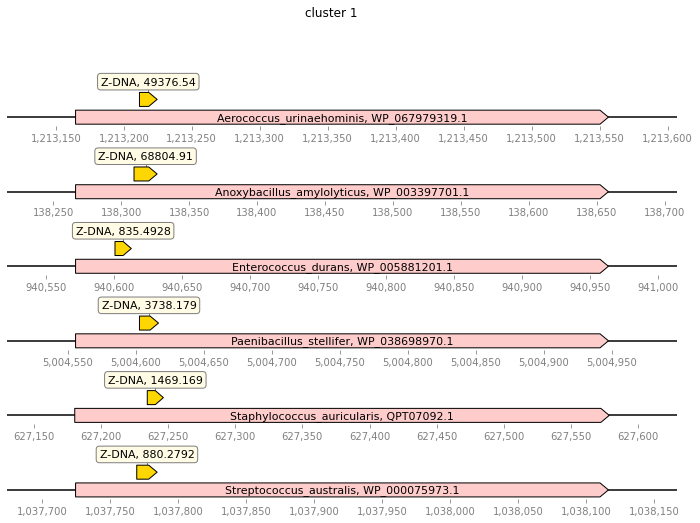

In [129]:
fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(12, 8))

table = pd.read_csv('cluster1.txt')


for i in range(len(table)):
    if table.iat[i,4] == '-':
        tmp = table.iat[i, 5]
        table.iat[i, 5] = table.iat[i, 2]+table.iat[i, 3]-table.iat[i, 6]
        table.iat[i, 6] = table.iat[i, 2]+table.iat[i, 3]-tmp
    
    features=[
        GraphicFeature(start=table.iat[i,5], end=table.iat[i,6], strand=+1, color="#ffd700",
                   label="Z-DNA, "+str(table.iat[i,7])),
        GraphicFeature(start=table.iat[i,2], end=table.iat[i,3], strand=+1, color="#ffcccc",
                   label=table.iat[i,0]+', '+table.iat[i,1]),

    ]
    record = GraphicRecord(sequence_length=table.iat[i,3]-table.iat[i,2]+100, \
                           first_index=table.iat[i,2]-50, features=features)
    record.plot(ax=ax[i])

_=fig.suptitle('cluster 1')
plt.savefig('group/cluster1.jpeg')

In [125]:
??GraphicRecord

### Cluster2:

In [87]:
out = open('cluster2.txt', 'w')
print('org','gene','start','end','strand','zstart','zend','zscore', sep=',',file=out)

for i in range(len(cl_2)-1):
    org = cl_2[i]
    ft = pd.read_csv('group/feature_table/'+org+'.txt', sep='\t')
    gene = cluster2.iat[0, i]
    ft = ft.loc[ft['product_accession'] == gene]
    
    zdna = pd.read_csv('group/promoters/'+org+'.bed', sep='\t', names=['1','2','3','4','5'])
    zdna=zdna.loc[zdna['5'] == gene]
    print(org[:org.find('_')],ft.iat[0, 10],ft.iat[0, 7], ft.iat[0, 8], ft.iat[0, 9],zdna.iat[0,1], zdna.iat[0,2],\
          zdna.iat[0,3], sep='\t')
    print(org,ft.iat[0, 10],ft.iat[0, 7], ft.iat[0, 8], ft.iat[0, 9],zdna.iat[0,1], zdna.iat[0,2],\
          zdna.iat[0,3], sep=',', file=out)
    #break


Aerococcus	WP_039934536.1	201917	203392	+	201927	201941	4860.206
Anoxybacillus	WP_171567143.1	1301197	1302663	+	1301253	1301269	38833.58
Enterococcus	WP_005876899.1	906425	907885	-	907883	907895	4860.206
Paenibacillus	WP_152400023.1	4362135	4363595	+	4362142	4362156	6090.891
Staphylococcus	WP_085237551.1	1539017	1540471	+	1539076	1539090	1030.205
Streptococcus	WP_109833421.1	223797	225251	+	223808	223821	2752.447


In [88]:
t2 = pd.read_csv('cluster2.txt')
t2

,org,gene,start,end,strand,zstart,zend,zscore
0,Aerococcus_viridans,WP_039934536.1,201917,203392,+,201927,201941,4860.206
1,Anoxybacillus_fermentans,WP_171567143.1,1301197,1302663,+,1301253,1301269,38833.580
2,Enterococcus_durans,WP_005876899.1,906425,907885,-,907883,907895,4860.206
3,Paenibacillus_cellulositrophicus,WP_152400023.1,4362135,4363595,+,4362142,4362156,6090.891
4,Staphylococcus_lutrae,WP_085237551.1,1539017,1540471,+,1539076,1539090,1030.205
5,Streptococcus_sobrinus,WP_109833421.1,223797,225251,+,223808,223821,2752.447


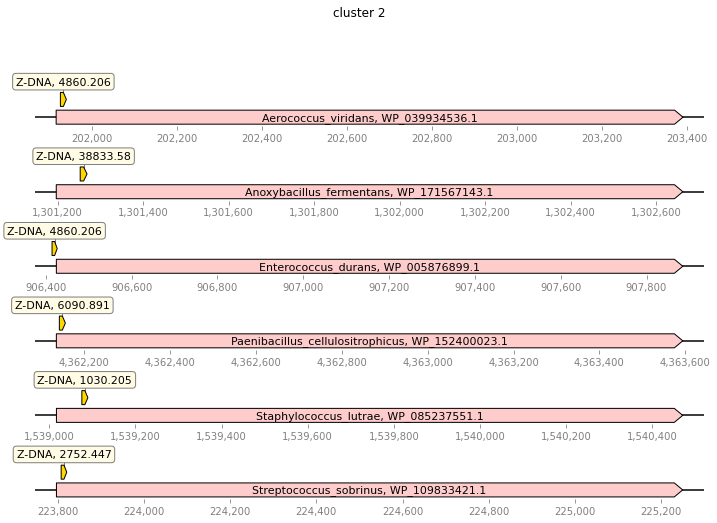

In [130]:
fig, ax = plt.subplots(nrows=6, ncols=1,figsize=(12, 8))

table = pd.read_csv('cluster2.txt')


for i in range(len(table)):
    if table.iat[i,4] == '-':
        tmp = table.iat[i, 5]
        table.iat[i, 5] = table.iat[i, 2]+table.iat[i, 3]-table.iat[i, 6]
        table.iat[i, 6] = table.iat[i, 2]+table.iat[i, 3]-tmp
    
    features=[
        GraphicFeature(start=table.iat[i,5], end=table.iat[i,6], strand=+1, color="#ffd700",
                   label="Z-DNA, "+str(table.iat[i,7])),
        GraphicFeature(start=table.iat[i,2], end=table.iat[i,3], strand=+1, color="#ffcccc",
                   label=table.iat[i,0]+', '+table.iat[i,1]),

    ]
    record = GraphicRecord(sequence_length=table.iat[i,3]-table.iat[i,2]+100, \
                           first_index=table.iat[i,2]-50, features=features)
    record.plot(ax=ax[i])

_=fig.suptitle('cluster 2')
plt.savefig('group/cluster2.jpeg')

Alignment:

In [136]:
!muscle -in group/cluster1.fasta -out group/cluster1_aligned.fasta
!muscle -in group/cluster2.fasta -out group/cluster2_aligned.fasta


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

cluster1 7 seqs, lengths min 130, max 132, avg 130
00:00:00     15 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     15 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:00     17 MB(1%)  Iter   1  100.00%  Align node       
00:00:00     17 MB(1%)  Iter   1  100.00%  Root alignment
00:00:00     17 MB(1%)  Iter   2  100.00%  Refine tree   
00:00:00     17 MB(1%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(1%)  Iter   2  100.00%  Root alignment
00:00:00     17 MB(1%)  Iter   3  100.00%  Refine biparts
00:00:00     17 MB(1%)  Iter   4  100.00%  Refine biparts
00:00:00     17 MB(1%)  Iter   5  100.00%  Refine biparts
00:00:00     17 MB(1%)  Iter   6  100.00%  Refine biparts
00:00:00     17 MB(1%)  Iter   7  100.00%  Refine biparts

MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
Thi

In [135]:
!muscle


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


Basic usage

    muscle -in <inputfile> -out <outputfile>

Common options (for a complete list please see the User Guide):

    -in <inputfile>    Input file in FASTA format (default stdin)
    -out <outputfile>  Output alignment in FASTA format (default stdout)
    -diags             Find diagonals (faster for similar sequences)
    -maxiters <n>      Maximum number of iterations (integer, default 16)
    -maxhours <h>      Maximum time to iterate in hours (default no limit)
    -html              Write output in HTML format (default FASTA)
    -msf               Write output in GCG MSF format (default FASTA)
    -clw               Write output in CLUSTALW format (default FASTA)
    -clwstrict         As -clw, with 'CLUSTAL W (1.81)' header
    -log[a] <logfile>  Log to file (append if -loga, overwrite if -log)
 